# This notebook covers the Udemy course:

https://www.udemy.com/share/10addu3@q8U1R34PSs5rLTP25FTattZRoUtTBAyxu2yqTyG708iTu7p9Omx3Fhj8WhEGW2XB/

In [ ]:
from sklearn import datasets # has 3 sample datasets: iris, breast cancer, boston housing
from sklearn.model_selection import train_test_split # helps us split dataset for training and testing purposes
from sklearn.ensemble import RandomForestClassifier # used for classication and regression
from sklearn.metrics import accuracy_score, confusion_matrix # helps us check the accuracy performance of our model
import matplotlib.pyplot as plt # draws graphs!
import seaborn as sns # data visualization library built on top of matplotlib - provides high level interface for creating informative and visually appealing statistical graphics

# Exploring the visualization API

In [ ]:
# quick demo of seaborn and matplotlib

x = [1,2,3,4,5]
y = [2,4,6,8,10]

sns.scatterplot(x=x, y=y)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

plt.show()

# Exploring the Breast Cancer data set

In [ ]:

breast_cancer = datasets.load_breast_cancer()
print(breast_cancer)
x = breast_cancer.data # Features (columns), the "feature_names" attribute lists the names of all the columns.
print(x[0])
y = breast_cancer.target # Target variable
print(breast_cancer.feature_names)



# Split the data for training and testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# random_state sets the random seed, it will use same randomness so it helps with reproducibility. Multiple people using same seed will get same results.
print(len(x_train)) # ~80%
print(len(x_test)) # ~20%

455
114


# RandomForestClassifier
An ensemble learning method based on decision trees. It contructs multiple decision trees during training and combines their predictions to make final predictions. Each decision tree is trained on a random subset of the data, and the final prediction is determined by **majority voting (classification)** or **averaging (rregression)** the individual tree predictions.

**n_estimators**: Higher n_estimators value means more accuracy, it basically sets the number of decision trees to be created. Setting it to a very high value like 1000 will take too much time, you need to find the right number by doing fine tuning.


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=10)



# Training RandomForestClassifier

In [ ]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

# Make predictions!

In [ ]:
y_pred = rf_classifier.predict(x_test)
print(y_pred) # prediction
print(y_test) # actual

[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


# Check the accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9649122807017544


# Evaluate the performance of a classification model

confusion_matrix can only be used when the output is 2 values i.e. binary i.e 0 and 1.

In our example:

*   0 - benign
*   1 - malignant

confusion_matrix is often visualized as a heatmap. Diagonal elements of the matrix (top-left and bottom-right) represent the correctly classified samples i.e. (true positive and true negative) while the off-diagonal elements represent the misclassified samples (false positive and false negative).

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[40  3]
 [ 1 70]]


# Create a heat map

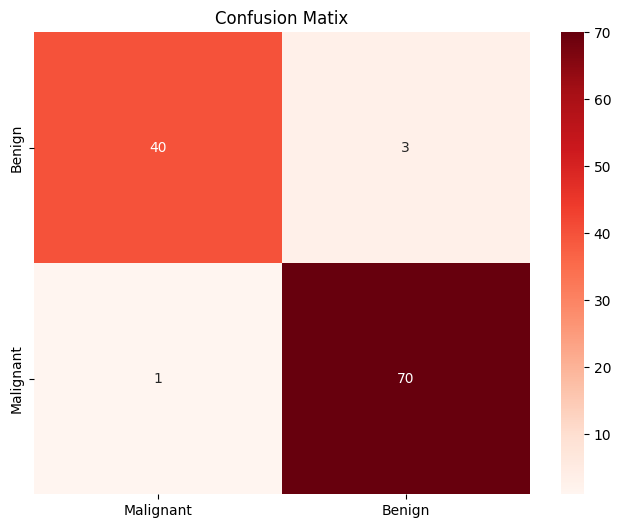

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Reds", fmt="d", xticklabels=["Malignant", "Benign"], yticklabels=["Benign", "Malignant"])
plt.title("Confusion Matix")
plt.show()

# Find out which feature/column affects the breast_cancer the most i.e. the important feature.

In [ ]:
importances = rf_classifier.feature_importances_
features = breast_cancer.feature_names
print(features)
print(importances)
print(sum(importances)) # will be ~1

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[0.06343062 0.00857579 0.00765356 0.04362531 0.00632599 0.00370344
 0.00570047 0.15678264 0.01131116 0.00217998 0.0087878  0.00128449
 0.00621957 0.00712842 0.00263797 0.00354389 0.00225917 0.00184368
 0.00563715 0.00782291 0.01585601 0.0194658  0.01958382 0.15062963
 0.00814405 0.01914471 0.02058759 0.38537314 0.00404416 0.00071706]
1.0000000000000002


# find indices of importances and features in descending order

**argsort** does the argument sort in an array (default is ascending order)
<br>
**[::-1]** does the descending order

In [ ]:
import numpy as np
indices = np.argsort(importances)[::-1]
print(indices)
print(importances[indices]) # sorts the array based on the sorted indices.

[27  7 23  0  3 26 22 21 25 20  8 10  1 24 19  2 13  4 12  6 18 28  5 15
 14 16  9 17 11 29]
[0.38537314 0.15678264 0.15062963 0.06343062 0.04362531 0.02058759
 0.01958382 0.0194658  0.01914471 0.01585601 0.01131116 0.0087878
 0.00857579 0.00814405 0.00782291 0.00765356 0.00712842 0.00632599
 0.00621957 0.00570047 0.00563715 0.00404416 0.00370344 0.00354389
 0.00263797 0.00225917 0.00217998 0.00184368 0.00128449 0.00071706]


# Create a bar chart of features based on importance

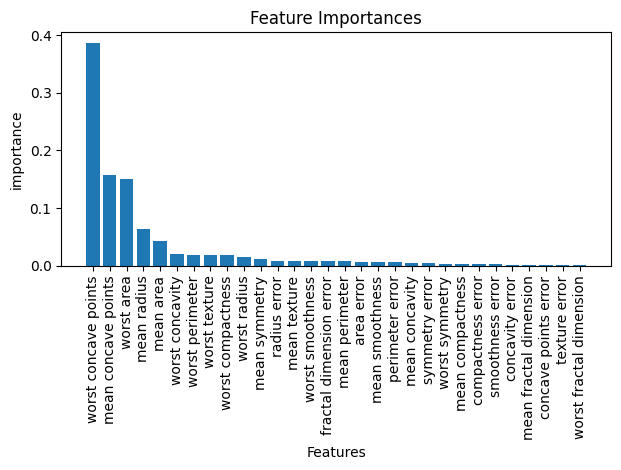

In [ ]:
plt.figure()
plt.title("Feature Importances")
plt.bar(range(x.shape[1]), importances[indices], align="center")
plt.xticks(range(x.shape[1]), features[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("importance")
plt.tight_layout()
plt.show()